In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import file
data=pd.read_csv('googleplaystore.csv')

Know the data

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.shape

(10841, 13)

In [5]:
#information about the data sets
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [9]:
def change_size(size):
    if 'M' in size:
        x=size[:-1]
        x=float(x)*1000
        return x
    if 'k' in size:
        x=size[:-1]
        x=float(x)
        return x
    else:
        return None

In [10]:
data['Size']=data['Size'].apply(change_size)

In [11]:
data['Size']

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10834     2600.0
10836    53000.0
10837     3600.0
10839        NaN
10840    19000.0
Name: Size, Length: 9360, dtype: float64

In [12]:
data.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1637
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [13]:
data['Size'].fillna(method='ffill',inplace=True)

In [14]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float)


In [15]:
data['Reviews'] = data['Reviews'].astype('int')

Installs field is currently stored as string and has values like 1,000,000+. 

Treat 1,000,000+ as 1,000,000

remove ‘+’, ‘,’ from the field, convert it to integer

In [16]:
data['Installs'] = data['Installs'].str.replace('+', '')
data['Installs'] = data['Installs'].str.replace(',', '')

In [17]:
data['Installs'] = data['Installs'].astype('int')

In [18]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

In [19]:
data['Price'] = data['Price'].str.replace('$', '')

In [20]:
data['Price'] = data['Price'].astype('float')

In [21]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#Sanity checks:

Average rating should be between 1 and 5 as only these values are allowed on the play store.

Drop the rows that have a value outside this range.

Reviews should not be more than installs as only those who installed can review the app.

If there are any such records, drop them.

For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [22]:
data[data['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [23]:
data[data['Rating']<1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [24]:
data[data['Reviews']>data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,30000.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [25]:
# drop these rows index
data.drop(data[data['Reviews'] > data['Installs']].index,inplace=True)

In [26]:
len(data[data['Reviews'] > data['Installs']])

0

In [27]:
data[data['Reviews']>data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [28]:
data.shape

(9353, 13)

In [29]:
data[(data['Type'] == 'Free') & (data['Price'] > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#Performing univariate analysis: 

Boxplot for Price

Are there any outliers? Think about the price of usual apps on Play Store.

Boxplot for Reviews

Are there any apps with very high number of reviews? Do the values seem right?

Histogram for Rating

How are the ratings distributed? Is it more toward higher ratings?

Histogram for Size

Note down your observations for the plots made above. Which of these seem to have outliers?

<AxesSubplot:>

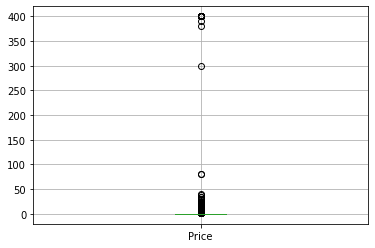

In [30]:
data.boxplot('Price')

#Yes price has outlier from 300

<AxesSubplot:>

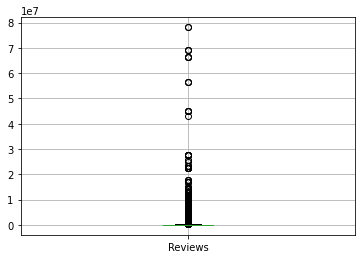

In [31]:
data.boxplot('Reviews')
#Yes price has outlier in the review above 400000


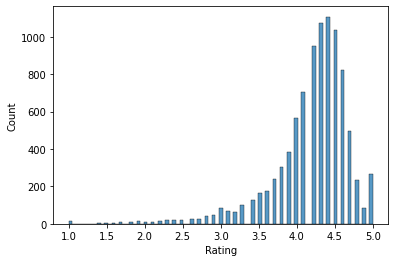

In [32]:
sns.histplot(x='Rating',data=data)
plt.show()
#Left Swewed
#More toward the higher rating

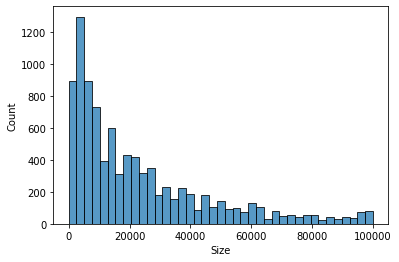

In [33]:
sns.histplot(x='Size',data=data)
plt.show()
#Right Skewed
#Max app has less than 20000KB

6. Outlier treatment: 

Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

Check out the records with very high price

Is 200 indeed a high price?

Drop these as most seem to be junk apps

Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

Decide a threshold as cutoff for outlier and drop records having values more than that

In [34]:
# Drop these as most seem to be junk apps
data[data['Price']>200].size

195

In [35]:
data.shape

(9353, 13)

In [36]:
data.drop(data[data['Price'] > 200].index,inplace=True)

In [37]:
data.shape

(9338, 13)

In [38]:
data[data['Reviews']>2000000].shape

(453, 13)

In [39]:
data.shape

(9338, 13)

In [40]:
#Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

data.drop(data[data['Reviews'] > 2000000].index,inplace=True)

In [41]:
data.shape

(8885, 13)

In [42]:
#Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.


#Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

#Decide a threshold as cutoff for outlier and drop records having values more than that

In [43]:
data['Installs'].quantile([0.1,0.25,0.50,0.90,0.95,0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [44]:
data[data['Installs']>100000000.0].shape


(20, 13)

In [45]:
data.drop(data[data['Installs'] >=100000000.0].index,inplace=True)

In [46]:
data[data['Installs']>100000000.0].shape


(0, 13)

In [47]:
data.shape

(8743, 13)

7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

Make scatter plot/joinplot for Rating vs. Price

What pattern do you observe? Does rating increase with price?

Make scatter plot/joinplot for Rating vs. Size

Are heavier apps rated better?

Make scatter plot/joinplot for Rating vs. Reviews

Does more review mean a better rating always?

Make boxplot for Rating vs. Content Rating

Is there any difference in the ratings? Are some types liked better?

Make boxplot for Ratings vs. Category

Which genre has the best ratings?

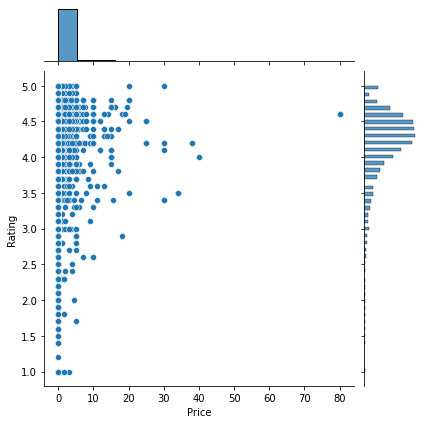

In [48]:
#Make scatter plot/joinplot for Rating vs. Price
sns.jointplot(x='Price',y='Rating',data=data)
plt.show()

#What pattern do you observe? Does rating increase with price?

Yes

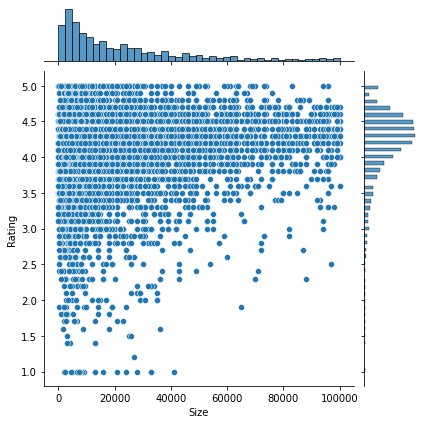

In [49]:
#Make scatter plot/joinplot for Rating vs. Size
sns.jointplot(y= 'Rating', x = 'Size', data = data)
plt.show()


#Are heavier apps rated better?

Yes

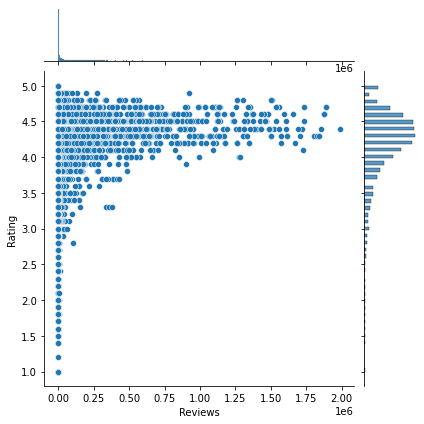

In [50]:
#Make scatter plot/joinplot for Rating vs. Reviews
sns.jointplot(y= 'Rating', x = 'Reviews', data = data)
plt.show()


#Does more review mean a better rating always?

No

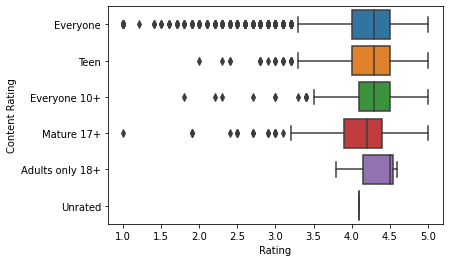

In [51]:
#Make boxplot for Rating vs. Content Rating
sns.boxplot(x='Rating',y='Content Rating',data=data)
plt.show()




#Is there any difference in the ratings? Are some types liked better?

Everyone

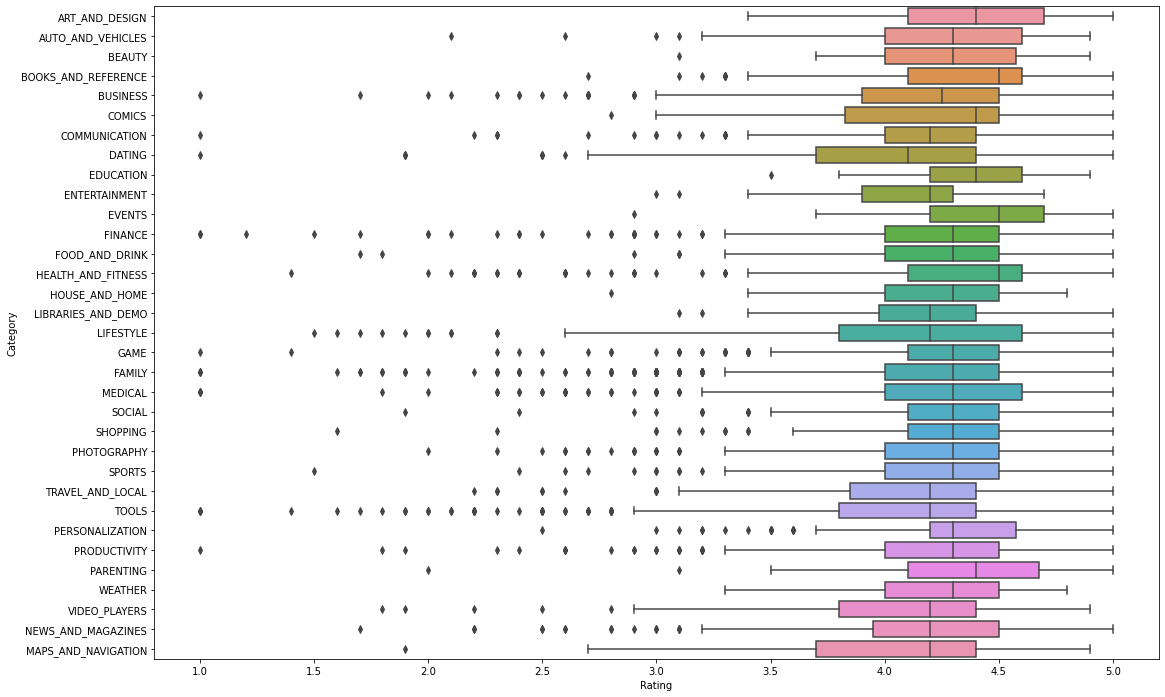

In [52]:
#Make boxplot for Ratings vs. Category
plt.figure(figsize=(18,12))
sns.boxplot(x='Rating',y='Category',data=data)
plt.show()


#Which genre has the best ratings?

Parenting

8. Data preprocessing

For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [53]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [54]:
#create a copy of the dataframe to make all the edits. Name it inp1.
inp1=data.copy()

#Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [56]:
inp1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [57]:
inp1['Installs']=inp1['Installs'].apply(np.log1p)


In [58]:
inp1['Reviews']=inp1['Reviews'].apply(np.log1p)


#Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.


In [61]:
inp1.drop(['App','Last Updated', 'Current Ver','Android Ver'],axis=1,inplace=True)

Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [62]:
inp1

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,12.281389,25000.0,17.727534,Free,0.0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
10834,FAMILY,4.0,2.079442,2600.0,6.216606,Free,0.0,Everyone,Education
10836,FAMILY,4.5,3.663562,53000.0,8.517393,Free,0.0,Everyone,Education
10837,FAMILY,5.0,1.609438,3600.0,4.615121,Free,0.0,Everyone,Education
10839,BOOKS_AND_REFERENCE,4.5,4.744932,3600.0,6.908755,Free,0.0,Mature 17+,Books & Reference


In [63]:
#convert categorica data into numeric
#label encoding 
#dummy encoding

In [70]:
inp2=pd.get_dummies(inp1)

In [65]:
inp2.shape

(8743, 161)

In [66]:
inp2

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,12.281389,25000.0,17.727534,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,4.0,2.079442,2600.0,6.216606,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,4.5,3.663562,53000.0,8.517393,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,5.0,1.609438,3600.0,4.615121,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,4.5,4.744932,3600.0,6.908755,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:

inp2=pd.get_dummies(inp1)


In [78]:
#extract features and target
y=inp2.pop('Rating')
X=inp2

In [79]:
X

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,5.075174,19000.0,9.210440,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.875232,14000.0,13.122365,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11.379520,8700.0,15.424949,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12.281389,25000.0,17.727534,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.875232,2800.0,11.512935,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,2.079442,2600.0,6.216606,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,3.663562,53000.0,8.517393,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,1.609438,3600.0,4.615121,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,4.744932,3600.0,6.908755,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
y

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 8743, dtype: float64

#9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.


In [85]:
#Separate the dataframes into X_train, y_train, X_test, and y_test.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)


In [86]:
X_train.shape

(6120, 160)

In [88]:
X_test.shape

(2623, 160)

In [89]:
y_train.shape

(6120,)

In [90]:
y_test.shape

(2623,)

11 . Model building

Use linear regression as the technique

Report the R2 on the train set

In [92]:
#Apply Linear Regression

from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()

In [94]:
linear_reg.fit(X_train,y_train) #object is learning LR on training data

LinearRegression()

In [95]:
#pred
y_pred=linear_reg.predict(X_test)

In [96]:
y_test

313      4.1
7907     3.8
9825     4.2
5661     3.7
10048    4.2
        ... 
7924     4.3
5916     3.1
9071     4.0
10301    5.0
10148    4.2
Name: Rating, Length: 2623, dtype: float64

In [97]:
y_pred

array([4.04742694, 3.9705283 , 4.20214468, ..., 4.30969141, 4.29988316,
       4.09565392])

In [100]:
# print the error

from sklearn.metrics import mean_squared_error
print("MSE=", mean_squared_error(y_test,y_pred))

MSE= 0.2290123877385508


In [101]:

from sklearn.metrics import mean_squared_error
print("MSE=", np.sqrt(mean_squared_error(y_test,y_pred)))

MSE= 0.4785523876636191


In [104]:
#Report the R2 on the train set

from sklearn.metrics import r2_score
print("R2 Score=", r2_score (y_test,y_pred))


R2 Score= 0.15335889694617666


In [105]:
#save model file
import joblib
joblib.dump(linear_reg,'linear_regression_model.sav')

['linear_regression_model.sav']

In [107]:
# load the model
model=joblib.load('linear_regression_model.sav')


In [108]:
model.predict(X_test)

array([4.04742694, 3.9705283 , 4.20214468, ..., 4.30969141, 4.29988316,
       4.09565392])